# Evaluation

In [175]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Define paths to the images
# Using raw string literals (r"...") to avoid issues with backslashes on Windows.

image_path_a = "results\\ifr_model_resnet_final\\test_latest_A\\images\\"
image_path_b = "results\\ifr_model_resnet_final\\test_latest_B\\images\\"


In [176]:
def extract_circles(image_path,image_type,plot=False):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    estimated_centers = [
    (128, 85),  # Center 1: (x, y) of the first circle
    (128, 170)   # Center 2: (x, y) of the second circle
    ]
    margin = 20  # Search radius (in pixels) around each estimated center
    all_detected_circles = []
    if image_type == 'high':
        # Optimized Hough Circle parameters for small, low-contrast circles
        HOUGH_PARAMS = {
            'dp': 1,
            'minDist': 30,
            'param1': 10,
            'param2': 10,
            'minRadius': 12,
            'maxRadius': 18
        }

        H, W = img_gray.shape

        # --- 2. Loop Through Each Estimated Center and Detect in ROI ---
        img_blurred = cv2.medianBlur(img_gray, 5) 
        for cx_estime, cy_estime in estimated_centers:
            _, img_thresh = cv2.threshold(img_blurred, img_blurred[cy_estime,cx_estime]+2, 255, cv2.THRESH_BINARY)
            # 2a. Define the boundaries of the Region of Interest (ROI)
            x_min = max(0, cx_estime - margin)
            x_max = min(W, cx_estime + margin)
            y_min = max(0, cy_estime - margin)
            y_max = min(H, cy_estime + margin)

            # 2b. Crop the image to the ROI
            img_roi_gray = img_gray[y_min:y_max, x_min:x_max]
            
            # 2c. Detect circles within the ROI
            circles_roi = cv2.HoughCircles(
                img_roi_gray, 
                cv2.HOUGH_GRADIENT, 
                **HOUGH_PARAMS
            )
            # 2d. Adjust coordinates and store results
            if circles_roi is not None:
                # Convert to integer and round
                circles_roi = np.uint16(np.around(circles_roi))
                
                # Adjust the coordinates (x and y) back to the original image frame
                # by adding the ROI offset (x_min, y_min)
                circles_roi[0, :, 0] += x_min 
                circles_roi[0, :, 1] += y_min
                
                # Append the detected circles to the main list
                # We need the circles as a list for correct merging later
                all_detected_circles.append(circles_roi[0])
    elif image_type == 'low':
        # Optimized Hough Circle parameters for small, low-contrast circles
        HOUGH_PARAMS = {
            'dp': 1,
            'minDist': 30,
            'param1': 10,
            'param2': 10,
            'minRadius': 12,
            'maxRadius': 16
        }

        H, W = img_gray.shape

        # --- 2. Loop Through Each Estimated Center and Detect in ROI ---
        img_blurred = cv2.medianBlur(img_gray, 5) 
        
        
        for cx_estime, cy_estime in estimated_centers:
            _, img_thresh = cv2.threshold(img_blurred, img_blurred[cy_estime,cx_estime]+2, 255, cv2.THRESH_BINARY)
            # 2a. Define the boundaries of the Region of Interest (ROI)
            x_min = max(0, cx_estime - margin)
            x_max = min(W, cx_estime + margin)
            y_min = max(0, cy_estime - margin)
            y_max = min(H, cy_estime + margin)

            # 2b. Crop the image to the ROI
            img_roi_gray = img_thresh[y_min:y_max, x_min:x_max]
            
            # 2c. Detect circles within the ROI
            circles_roi = cv2.HoughCircles(
                img_roi_gray, 
                cv2.HOUGH_GRADIENT, 
                **HOUGH_PARAMS
            )

            # 2d. Adjust coordinates and store results
            if circles_roi is not None:
                # Convert to integer and round
                circles_roi = np.uint16(np.around(circles_roi))
                
                # Adjust the coordinates (x and y) back to the original image frame
                # by adding the ROI offset (x_min, y_min)
                circles_roi[0, :, 0] += x_min 
                circles_roi[0, :, 1] += y_min
                
                # Append the detected circles to the main list
                # We need the circles as a list for correct merging later
                all_detected_circles.append(circles_roi[0])

    else :
        print('Image type not low nor high')
        return []
    if plot :
        img_circles = np.copy(img)
        circles = None
        # Merge all detected circle arrays into a single NumPy array (if circles were found)
        if all_detected_circles:
            circles = np.concatenate(all_detected_circles, axis=0)
            
            print(f"Total circles detected: {len(circles)}")
            
            for i in circles:
                # Draw the outer circle (Green)
                cv2.circle(img_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Draw the center of the circle (Red)
                cv2.circle(img_circles, (i[0], i[1]), 2, (0, 0, 255), 3)

        # Display the image with detected circles
        plt.figure(figsize=(8,8))
        plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
        plt.title('Detected Circles in Image (Dual-ROI Search)')
        plt.suptitle(f'Image: {image_path}')
        plt.axis('off')
        plt.show()
        if circles is not None:
            print("--- Circle Properties for the Image ---")
            for i, circle in enumerate(circles):
                center_x, center_y, radius = circle
                print(f"Circle {i+1}:")
                print(f"  Radius: {radius} pixels")
                print(f"  Center: ({center_x}, {center_y})")
                print(f"  Roundness (by Hough definition): 1.0")
        else:
            print("No circles were detected in the Image.")
    return all_detected_circles
        


In [177]:
# extract_circles(os.path.join(image_path_a, '0_real.png'),'high',plot=True)

Processing real_low images from results\ifr_model_resnet_final\test_latest_A\images\...
No circle detected in image results\ifr_model_resnet_final\test_latest_A\images\5_real.png
Processing fake_high images from results\ifr_model_resnet_final\test_latest_A\images\...
Processing real_high images from results\ifr_model_resnet_final\test_latest_B\images\...
Processing fake_low images from results\ifr_model_resnet_final\test_latest_B\images\...

--- Data Extraction Complete ---
real_low: Found 77 circles.
fake_high: Found 100 circles.
real_high: Found 100 circles.
fake_low: Found 86 circles.


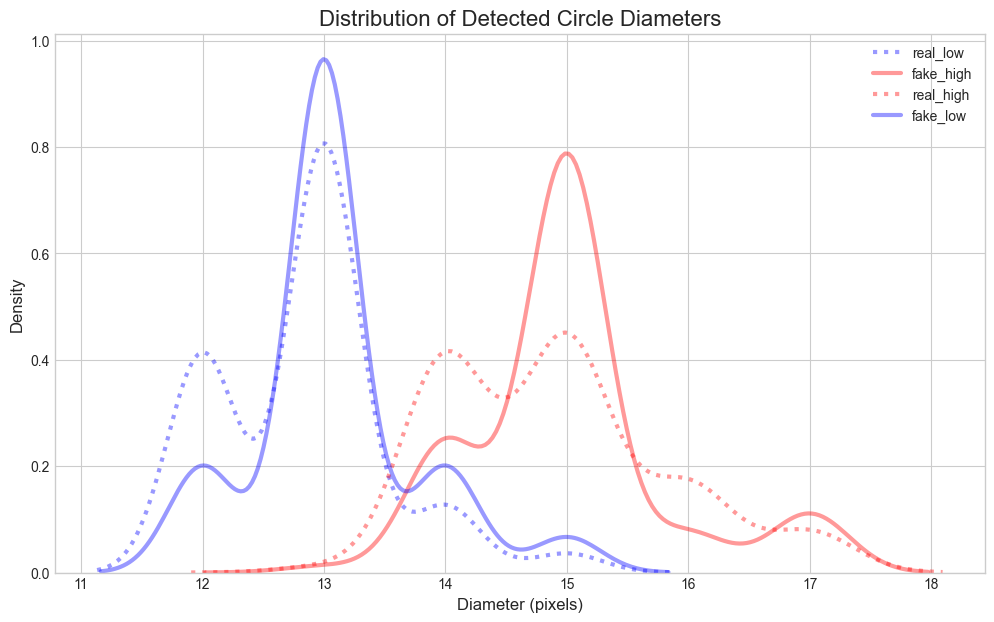

real_low [np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(124), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126), np.uint16(126)

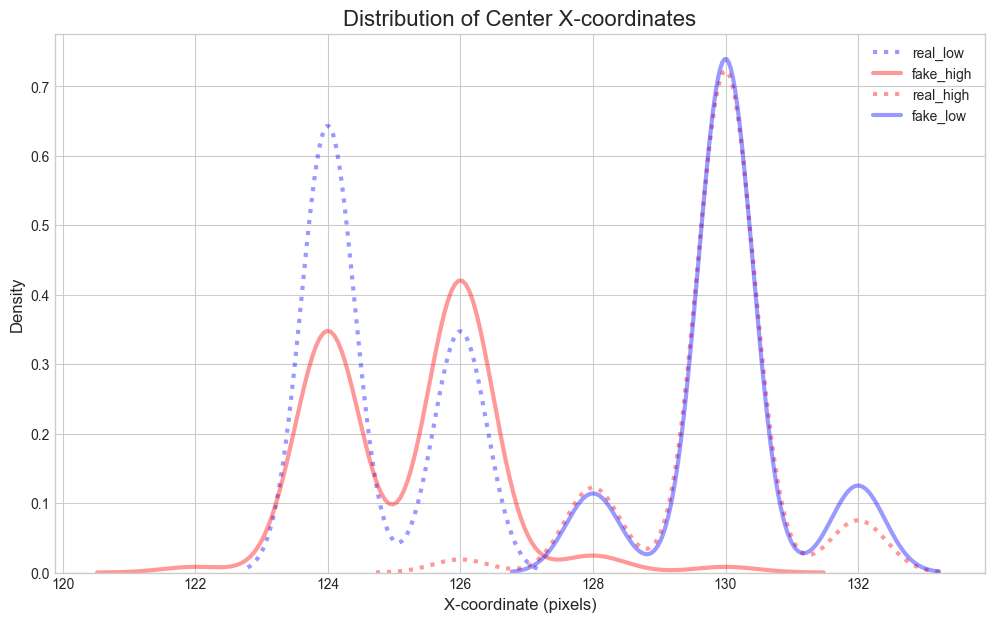

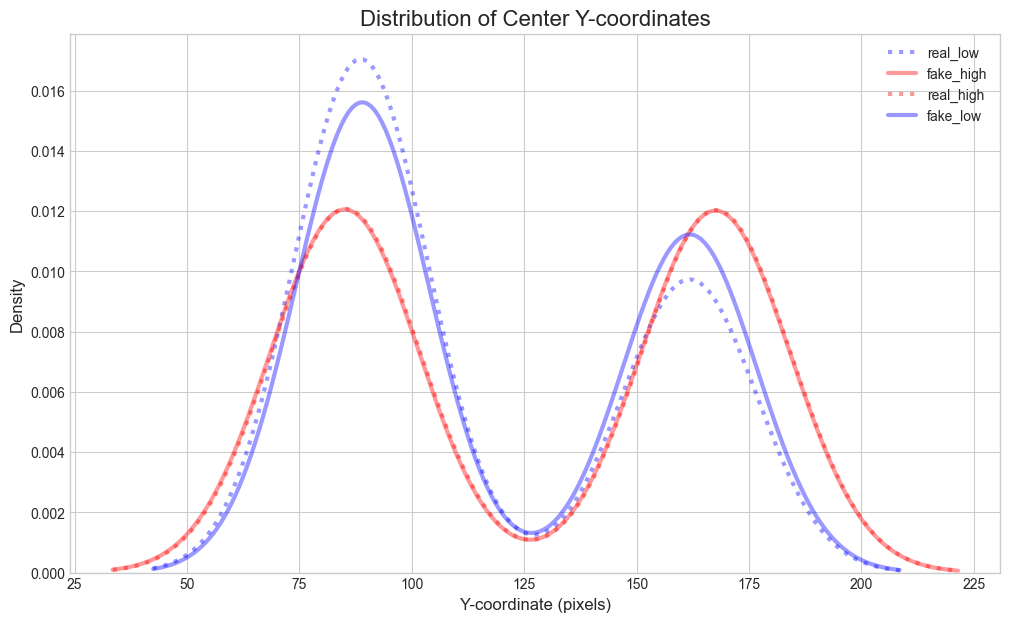

In [183]:
# Initialize lists to store circle properties for each category
# We will store radius, center_x, and center_y
data = {
    'real_low': {'radii': [], 'centers_x': [], 'centers_y': []},
    'fake_high': {'radii': [], 'centers_x': [], 'centers_y': []},
    'real_high': {'radii': [], 'centers_x': [], 'centers_y': []},
    'fake_low': {'radii': [], 'centers_x': [], 'centers_y': []}
}

def process_images(folder_path, image_type, category,plot=False):
    """Helper function to process all images in a folder."""
    print(f"Processing {category} images from {folder_path}...")
    # Ensure the folder exists
    if not os.path.isdir(folder_path):
        print(f"Error: Directory not found at {folder_path}")
        return
        
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('_real.png', '_fake.png'))]
    
    for filename in image_files:
        # We only process images that match the expected naming convention
        if ('_real' in filename and 'real' in category) or \
           ('_fake' in filename and 'fake' in category):
            
            image_path = os.path.join(folder_path, filename)
            circles = extract_circles(image_path, image_type,plot=plot)
            if not circles:
                circles = np.array([])
            else:
                # Concatenate the list of arrays into a single (N, 3) array
                circles = np.concatenate(circles, axis=0)
                circles = np.uint16(np.around(circles))
            if len(circles) > 0:
                # circles is an array of [x, y, radius]
                data[category]['centers_x'].extend(circles[:,0])
                data[category]['centers_y'].extend(circles[:,1])
                data[category]['radii'].extend(circles[:,2])
            else :
                print(f'No circle detected in image {image_path}')

# --- Loop 1: 'low' (a) are real, 'high' (b) are fake ---
process_images(image_path_a, 'low', 'real_low')
process_images(image_path_a, 'high', 'fake_high')

# --- Loop 2: 'high' (b) are real, 'low' (a) are fake ---
process_images(image_path_b, 'high', 'real_high')
process_images(image_path_b, 'low', 'fake_low')

print("\n--- Data Extraction Complete ---")
for category, values in data.items():
    print(f"{category}: Found {len(values['radii'])} circles.")

# Convert radii to diameters for plotting
diameters = {
    'real_low': np.array(data['real_low']['radii']),
    'fake_high': np.array(data['fake_high']['radii']),
    'real_high': np.array(data['real_high']['radii']),
    'fake_low': np.array(data['fake_low']['radii'])
}


plt.style.use('seaborn-v0_8-whitegrid')
# --- Plot 1: Distribution of Circle Diameters (Superimposed) ---
plt.figure(figsize=(12, 7))
sns.set_palette("viridis") # Using a different color palette for clarity
color_map = {'real_low': 'blue', 'fake_high': 'red', 'real_high': 'red', 'fake_low': 'blue'}

# Plot a histogram and a KDE curve for each category
for label, diam_values in diameters.items():
    if len(diam_values) > 0:
        if 'real' in label :
            sns.kdeplot(data=diam_values, linestyle=':', fill=False, label=label, color=color_map[label], alpha=0.4, linewidth=3)
        else :
            sns.kdeplot(data=diam_values, fill=False, label=label, color=color_map[label], alpha=0.4, linewidth=3)

plt.title('Distribution of Detected Circle Diameters', fontsize=16)
plt.xlabel('Diameter (pixels)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


# --- Plot 2: Distribution of Circle Center X-coordinates (Superimposed) ---
plt.figure(figsize=(12, 7))

for label, values in data.items():
    print(label,sorted(values['centers_x']))
    if 'real' in label :
        sns.kdeplot(data=values['centers_x'], linestyle=':', fill=False, label=label, color=color_map[label], alpha=0.4, linewidth=3)
    else :
        sns.kdeplot(data=values['centers_x'], fill=False, label=label, color=color_map[label], alpha=0.4, linewidth=3)
plt.title('Distribution of Center X-coordinates', fontsize=16)
plt.xlabel('X-coordinate (pixels)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


# --- Plot 3: Distribution of Circle Center Y-coordinates (Superimposed) ---
plt.figure(figsize=(12, 7))

for label, values in data.items():
    if 'real' in label :
        sns.kdeplot(data=values['centers_y'], linestyle=':', fill=False, label=label, color=color_map[label], alpha=0.4, linewidth=3)
    else :
        sns.kdeplot(data=values['centers_y'], fill=False, label=label, color=color_map[label], alpha=0.4, linewidth=3)
plt.title('Distribution of Center Y-coordinates', fontsize=16)
plt.xlabel('Y-coordinate (pixels)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

# Another Idea

192
Total circles detected: 2


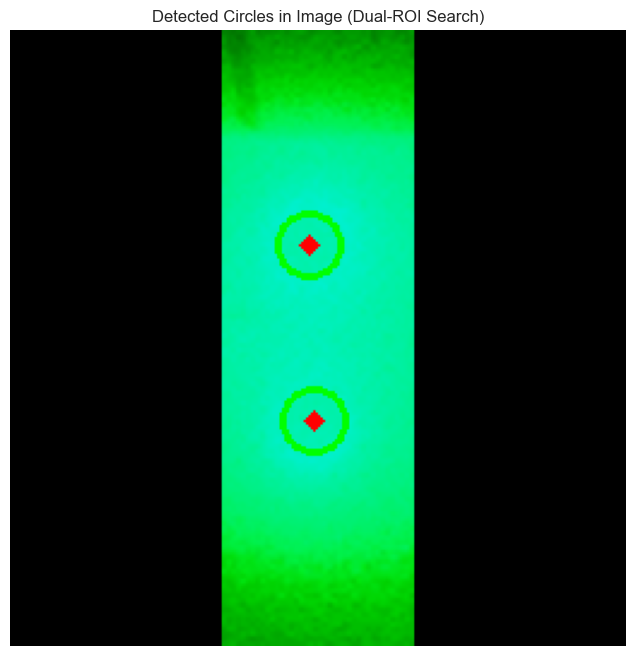

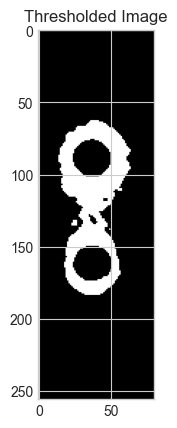

In [179]:
img = cv2.imread(os.path.join(image_path_a, '15_real.png'))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# --- 1. Définir les Paramètres de Filtrage ---
# Ajustez ces valeurs pour cibler la taille de vos cercles
MIN_RADIUS = 5
MAX_RADIUS = 15
# Seuil de circularité minimal (1.0 est un cercle parfait). 
# Pour de vraies images, utilisez une valeur inférieure.
MIN_CIRCULARITY = 0.75 

# --- 2. Pré-traitement et Seuillage (Thresholding) ---
# Votre cercle est noir (valeur faible) sur fond vert/clair (valeur élevée).
# Un seuillage binaire inverse (cv2.THRESH_BINARY_INV) isole les objets sombres.

# Appliquer un flou pour réduire le bruit (médian est bon pour les points/taches)
img_blurred = cv2.medianBlur(img_gray[:,88:168], 5) 

# Seuillage: tout ce qui est plus foncé que 50 devient blanc (255), 
# et le reste devient noir (0). Inverse pour isoler les objets noirs.
# Ajustez '50' en fonction du contraste réel de votre image.
_, img_thresh = cv2.threshold(img_blurred, img_blurred[85,128-88]+2, 255, cv2.THRESH_BINARY)
print(img_blurred[85,128-88]-1)
# for high 215

# --- 3. Détection de Contours ---
# Trouver les contours dans l'image seuillée
# cv2.RETR_EXTERNAL pour ne trouver que les contours extérieurs
# HOUGH_PARAMS = {
#             'dp': 1,
#             'minDist': 30,
#             'param1': 10,
#             'param2': 15,
#             'minRadius': 12,
#             'maxRadius': 18
#         }
HOUGH_PARAMS = {
    'dp': 1,
    'minDist': 30,
    'param1': 10,
    'param2': 10,
    'minRadius': 12,
    'maxRadius': 16
}

H, W = img_gray.shape

# --- 2. Loop Through Each Estimated Center and Detect in ROI ---
estimated_centers = [
    (40, 85),  # Center 1: (x, y) of the first circle
    (40, 170)   # Center 2: (x, y) of the second circle
]
margin = 20  # Search radius (in pixels) around each estimated center
all_detected_circles = []
for cx_estime, cy_estime in estimated_centers:
    
    # 2a. Define the boundaries of the Region of Interest (ROI)
    x_min = max(0, cx_estime - margin)
    x_max = min(W, cx_estime + margin)
    y_min = max(0, cy_estime - margin)
    y_max = min(H, cy_estime + margin)

    # 2b. Crop the image to the ROI
    img_roi_gray = img_thresh[y_min:y_max, x_min:x_max]
    # 2c. Detect circles within the ROI
    circles_roi = cv2.HoughCircles(
        img_roi_gray, 
        cv2.HOUGH_GRADIENT, 
        **HOUGH_PARAMS
    )

    # 2d. Adjust coordinates and store results
    if circles_roi is not None:
        # Convert to integer and round
        circles_roi = np.uint16(np.around(circles_roi))
        
        # Adjust the coordinates (x and y) back to the original image frame
        # by adding the ROI offset (x_min, y_min)
        circles_roi[0, :, 0] += x_min 
        circles_roi[0, :, 1] += y_min
        
        # Append the detected circles to the main list
        # We need the circles as a list for correct merging later
        all_detected_circles.append(circles_roi[0])

img_circles = np.copy(img)
circles = None
# Merge all detected circle arrays into a single NumPy array (if circles were found)
if all_detected_circles:
    circles = np.concatenate(all_detected_circles, axis=0)
    
    print(f"Total circles detected: {len(circles)}")
    
    for i in circles:
        # Draw the outer circle (Green)
        cv2.circle(img_circles, (i[0]+88, i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle (Red)
        cv2.circle(img_circles, (i[0]+88, i[1]), 2, (0, 0, 255), 3)

# Display the image with detected circles
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles in Image (Dual-ROI Search)')
plt.axis('off')
plt.show()


# Pour déboguer l'étape de seuillage :
plt.imshow(img_thresh, cmap='gray'); plt.title('Thresholded Image'); plt.show()